In [1]:
import torch
from torch import nn
from torch import optim
from torch.nn import functional as F
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import Dataset
from torch.utils.data import dataloader
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
import numpy as np
import torchvision.utils as vutils

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [3]:
num_epochs = 200
batch_size = 128
batches = 15747/batch_size

dataset = datasets.ImageFolder(root="cats",
                           transform=transforms.Compose([
                               transforms.ToTensor(),
                               transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
                           ]))

data_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True, drop_last=True)

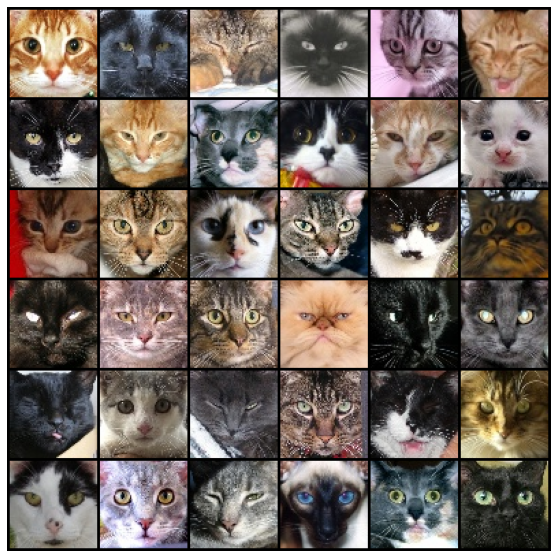

In [4]:
# Some real cat faces from the dataset
real_batch = next(iter(data_loader))
plt.figure(figsize=(10,10))
plt.axis("off")
plt.imshow(np.transpose(vutils.make_grid(real_batch[0].to(device)[:36], nrow= 6, padding=2, normalize=True).cpu(),(1,2,0)))

In [5]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.conv1 = nn.Conv2d(3,   64,  kernel_size=4, stride=2, padding=1, bias=False)
        self.conv2 = nn.Conv2d(64,  128, kernel_size=4, stride=2, padding=1, bias=False)
        self.conv3 = nn.Conv2d(128, 256, kernel_size=4, stride=2, padding=1, bias=False)
        self.conv4 = nn.Conv2d(256, 512, kernel_size=4, stride=2, padding=1, bias=False)
        self.conv5 = nn.Conv2d(512, 1,   kernel_size=4, stride=1, padding=0, bias=False)
        self.conv_norm1 = nn.BatchNorm2d(128)
        self.conv_norm2 = nn.BatchNorm2d(256)
        self.conv_norm3 = nn.BatchNorm2d(512)

    def forward(self, x):
        x = F.leaky_relu(self.conv1(x))
        x = F.leaky_relu(self.conv_norm1(self.conv2(x)))
        x = F.leaky_relu(self.conv_norm2(self.conv3(x)))
        x = F.leaky_relu(self.conv_norm3(self.conv4(x)))
        x = torch.sigmoid(self.conv5(x))
        return x

In [6]:
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.conv1 = nn.ConvTranspose2d(100, 512, kernel_size=4, stride=1, padding=0, bias=False)
        self.conv2 = nn.ConvTranspose2d(512, 256, kernel_size=4, stride=2, padding=1, bias=False)
        self.conv3 = nn.ConvTranspose2d(256, 128, kernel_size=4, stride=2, padding=1, bias=False)
        self.conv4 = nn.ConvTranspose2d(128, 64,  kernel_size=4, stride=2, padding=1, bias=False)
        self.conv5 = nn.ConvTranspose2d(64,  3,   kernel_size=4, stride=2, padding=1, bias=False)
        self.conv_norm1 = nn.BatchNorm2d(512)
        self.conv_norm2 = nn.BatchNorm2d(256)
        self.conv_norm3 = nn.BatchNorm2d(128)
        self.conv_norm4 = nn.BatchNorm2d(64)

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv_norm1(x)
        x = F.relu(x)
        x = F.relu(self.conv_norm2(self.conv2(x)))
        x = F.relu(self.conv_norm3(self.conv3(x)))
        x = F.relu(self.conv_norm4(self.conv4(x)))
        x = torch.tanh(self.conv5(x))
        return x

In [7]:
discriminator = Discriminator().to(device)
generator     = Generator().to(device)

d_optimizer = optim.Adam(discriminator.parameters(), lr=0.0002, betas=(0.5, 0.999))
g_optimizer = optim.Adam(generator.parameters(),     lr=0.0002, betas=(0.5, 0.999))

loss = nn.BCELoss()

fixed_noise = torch.randn(64, 100, 1, 1, device=device)

In [8]:
def save_progress(epoch):
    fake_batch = generator(torch.randn(36, 100, 1, 1, device=device))
    plt.imshow(np.transpose(vutils.make_grid(fake_batch.to(device)[:36], nrow= 6, padding=2, normalize=True).cpu(),(1,2,0)))
    plt.savefig("catprogress/"+str(epoch)+".png", bbox_inches='tight')

epoch: 0 / 200
epoch: 1 / 200
epoch: 2 / 200
epoch: 3 / 200
epoch: 4 / 200
epoch: 5 / 200
epoch: 6 / 200
epoch: 7 / 200
epoch: 8 / 200
epoch: 9 / 200
epoch: 10 / 200
epoch: 11 / 200
epoch: 12 / 200
epoch: 13 / 200
epoch: 14 / 200
epoch: 15 / 200
epoch: 16 / 200
epoch: 17 / 200
epoch: 18 / 200
epoch: 19 / 200
epoch: 20 / 200
epoch: 21 / 200
epoch: 22 / 200
epoch: 23 / 200
epoch: 24 / 200
epoch: 25 / 200
epoch: 26 / 200
epoch: 27 / 200
epoch: 28 / 200
epoch: 29 / 200
epoch: 30 / 200
epoch: 31 / 200
epoch: 32 / 200
epoch: 33 / 200
epoch: 34 / 200
epoch: 35 / 200
epoch: 36 / 200
epoch: 37 / 200
epoch: 38 / 200
epoch: 39 / 200
epoch: 40 / 200
epoch: 41 / 200
epoch: 42 / 200
epoch: 43 / 200
epoch: 44 / 200
epoch: 45 / 200
epoch: 46 / 200
epoch: 47 / 200
epoch: 48 / 200
epoch: 49 / 200
epoch: 50 / 200
epoch: 51 / 200
epoch: 52 / 200
epoch: 53 / 200
epoch: 54 / 200
epoch: 55 / 200
epoch: 56 / 200
epoch: 57 / 200
epoch: 58 / 200
epoch: 59 / 200
epoch: 60 / 200
epoch: 61 / 200
epoch: 62 / 200
ep

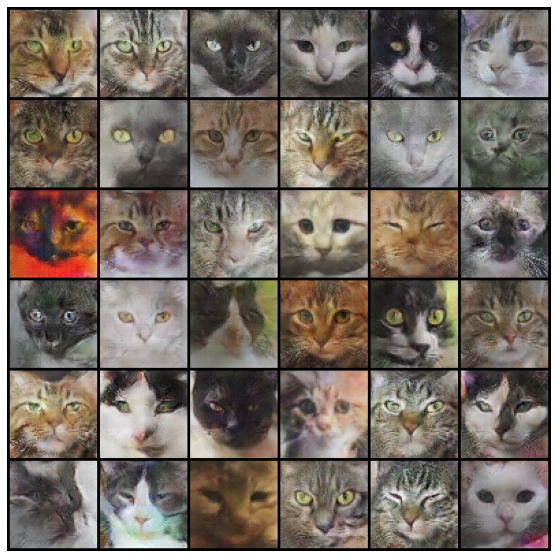

In [9]:
plt.figure(figsize=(10,10))
plt.axis("off")
    
for epoch in range(num_epochs):
    print("epoch:", epoch, "/", num_epochs)
    
    for i, data in enumerate(data_loader, 0):
        print("{:.0f}%".format(i*100/batches), end="\r")
        
        # Discriminator step
        discriminator.zero_grad()
        label = torch.full((batch_size,), 1, dtype=torch.float, device=device)
        output = discriminator(data[0].to(device)).view(-1)
        errD_real = loss(output, label)
        errD_real.backward()
        noise = torch.randn(batch_size, 100, 1, 1, device=device)
        fake = generator(noise)
        label.fill_(0)
        output = discriminator(fake.detach()).view(-1)
        errD_fake = loss(output, label)
        errD_fake.backward()
        d_optimizer.step()
        
        # Generator step
        generator.zero_grad()
        label.fill_(1)
        output = discriminator(fake).view(-1)
        errG = loss(output, label)
        errG.backward()
        g_optimizer.step()
    
    save_progress(epoch)

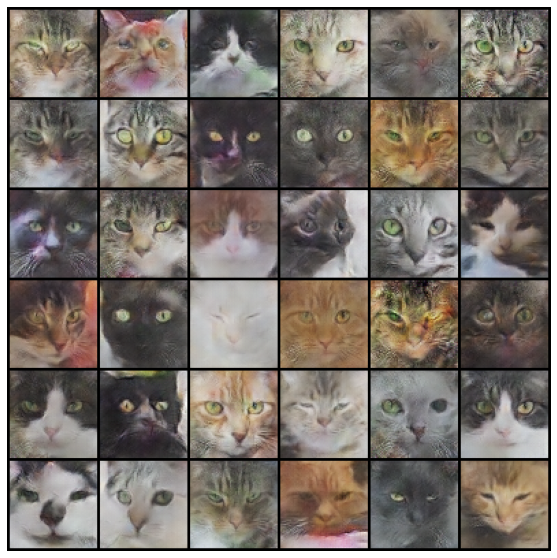

In [11]:
# Some fake cat faces from the generator
fake_batch = generator(torch.randn(36, 100, 1, 1, device=device))
plt.figure(figsize=(10,10))
plt.axis("off")
plt.imshow(np.transpose(vutils.make_grid(fake_batch.to(device)[:36], nrow= 6, padding=2, normalize=True).cpu(),(1,2,0)))